#### The dataset is taken from the kaggle https://www.kaggle.com/abineshkumark/carsdata

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [73]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
cars_df = pd.read_csv('cars.csv')

In [75]:
#display the head(first 5 rows) of the dataset
cars_df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


The objective is to group the data based on the brands. Since this is an unsupervised learning, we will remove the output target before training


Step1: Print the shape of the dataset

In [76]:
print('The shape of the dataset:', cars_df.shape)

The shape of the dataset: (261, 8)


Step2: Display the information about the dataset

In [77]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [125]:
cars_df[' brand'].value_counts()

 US.        162
 Japan.      51
 Europe.     48
Name:  brand, dtype: int64

In [78]:
cars_df.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

In [79]:
#we can see some of the input variables are shown as object but acutal values are integer
#Let's convert the all the input data into numeric value

#But before converting them, let's check whether all the values are numeric
print('Count of numeric values in cubicinches:', cars_df[' cubicinches'].str.isnumeric().sum())
print('Count of numeric values in weightlbs:', cars_df[' weightlbs'].str.isnumeric().sum())

Count of numeric values in cubicinches: 259
Count of numeric values in weightlbs: 258


Observations:               
1) Out of 261 total records, for cubicinches 2 rows have missing values.          
2) Out of 261 total records, for weightlbs 3 rows have missing values.      

In [80]:
#let's display the records which are not numeric so that we can fill those values accordingly
cars_df[~cars_df[' cubicinches'].str.isnumeric()]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,,105,3897,19,1976,US.
180,19.8,6,,85,2990,18,1980,US.


In [81]:
#let's display the records which are not numeric so that we can fill those values accordingly
cars_df[~cars_df[' weightlbs'].str.isnumeric()]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
14,19.1,6,225,90,,19,1981,US.
33,21.0,6,199,90,,15,1971,US.
172,29.0,4,68,49,,20,1974,Europe.


Since the values are space, either we can impute them with mean or simply drop the records as the count is totally 5.

In [82]:
cars_final_df = cars_df[(cars_df[' cubicinches'] != ' ') & (cars_df[' weightlbs'] != ' ')]

In [87]:
cars_final_df.shape

(256, 8)

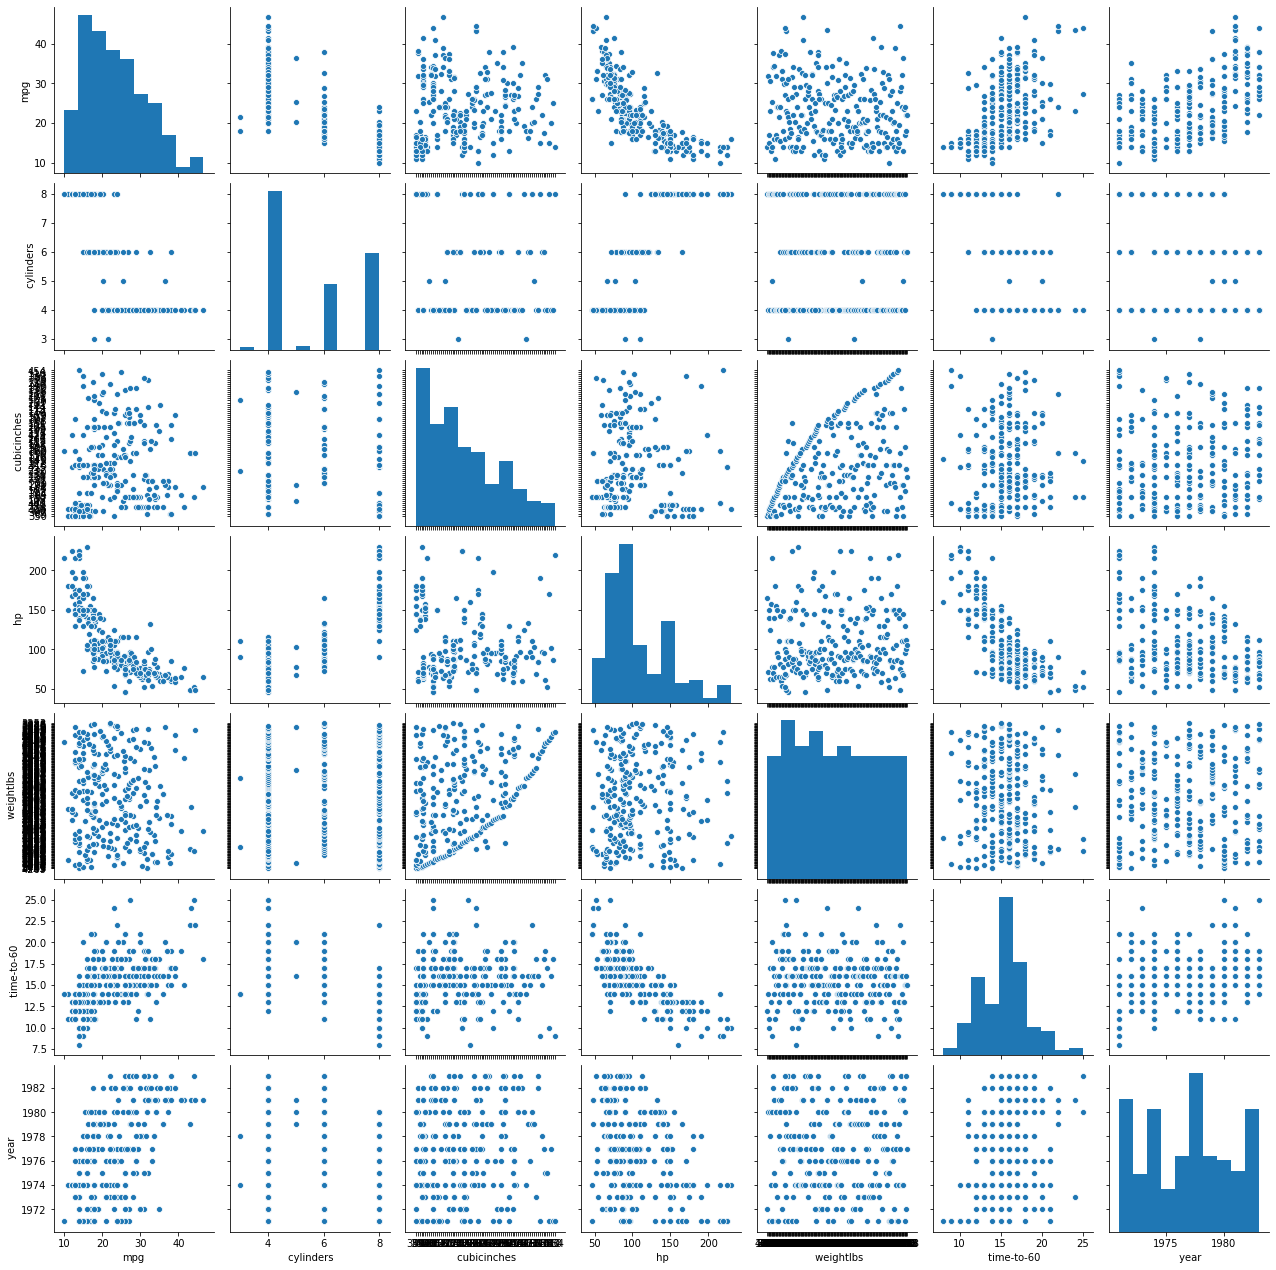

In [61]:
#let's visualise the data and see if there are any clusters
#usually the peaks in the pair plot reveals the number of clusters in general
sns.pairplot(cars_final_df)

Observation:
If we look at the cylinders value closely, we have three prominent peaks(groups).

In [89]:
X = cars_final_df.drop(' brand', axis=1)
y = cars_final_df[' brand']

In [91]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=100)

In [97]:
#instead of the acutal year, we can find the difference between the current year and the year given

train_x[' year'] = train_x[' year'].apply(lambda x: 2021 - x)
test_x[' year'] = test_x[' year'].apply(lambda x: 2021 - x)

In [98]:
#let's display the final output
train_x.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
178,20.2,8,302,139,3570,13,42
230,15.0,8,383,170,3563,10,50
30,27.0,4,97,88,2130,15,50
45,31.6,4,120,74,2635,18,39
129,36.1,4,98,66,1800,14,42


In [102]:
#since the kmeans algorithm is based on the distance metrics, we need to normalize all the input features.
#The standardization procedure allows the model to give equal importance to all the input variables.
scaler = StandardScaler().fit(train_x.values)
train_scaled_data = scaler.transform(train_x.values)
test_scaled_data = scaler.transform(test_x.values)

In [104]:
train_x.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year'],
      dtype='object')

In [107]:
final_train = pd.DataFrame(train_scaled_data, columns=train_x.columns)
final_test = pd.DataFrame(test_scaled_data, columns=test_x.columns)

In [110]:
final_train.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,-0.355450,1.323006,0.890617,0.793039,0.619497,-0.859539,-0.578408
1,-1.021871,1.323006,1.639398,1.570105,0.611278,-1.893011,1.627110
2,0.516024,-0.964225,-1.004448,-0.485359,-1.071138,-0.170557,1.627110
3,1.105551,-0.964225,-0.791831,-0.836291,-0.478242,0.862916,-1.405477
4,1.682262,-0.964225,-0.995203,-1.036825,-1.458576,-0.515048,-0.578408


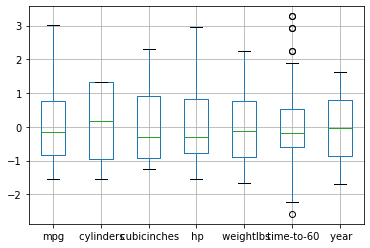

In [111]:
#let use boxplot to see the presence of outliers
final_train.boxplot()

Observation: We do not have much outliers.

In [113]:
#since we do not know the 'k' value, let's take a range and then using elbow method will finalise

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(final_train)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,1428.000000
1,2,640.988150
2,3,465.615549
3,4,372.271187
4,5,327.428083
5,6,292.792021
6,7,278.011258
7,8,248.015962
8,9,222.563838
9,10,214.831457


Using elbow method, the optimal value of 'K' is determined.

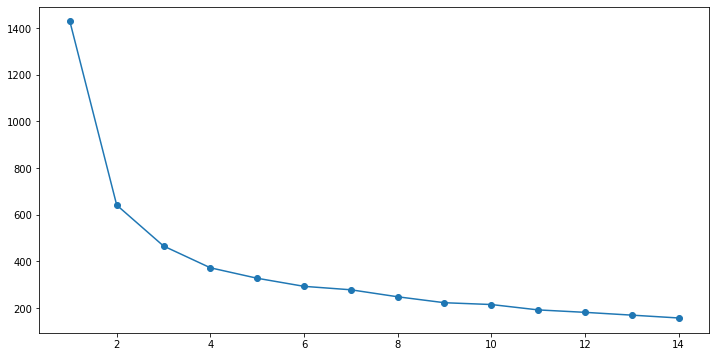

In [115]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Observation: As we can see, after the cluster 4, the reduction in the error becomes insignificant.

In [116]:
#we can take the 'K' as 4 
kmeans = KMeans(n_clusters=4, n_init = 5, random_state=200)
kmeans.fit(final_train)

KMeans(n_clusters=4, n_init=5, random_state=200)

In [118]:
target = kmeans.predict(final_train)

In [119]:
final_train['target'] = target

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021031856488>,
      dtype=object)

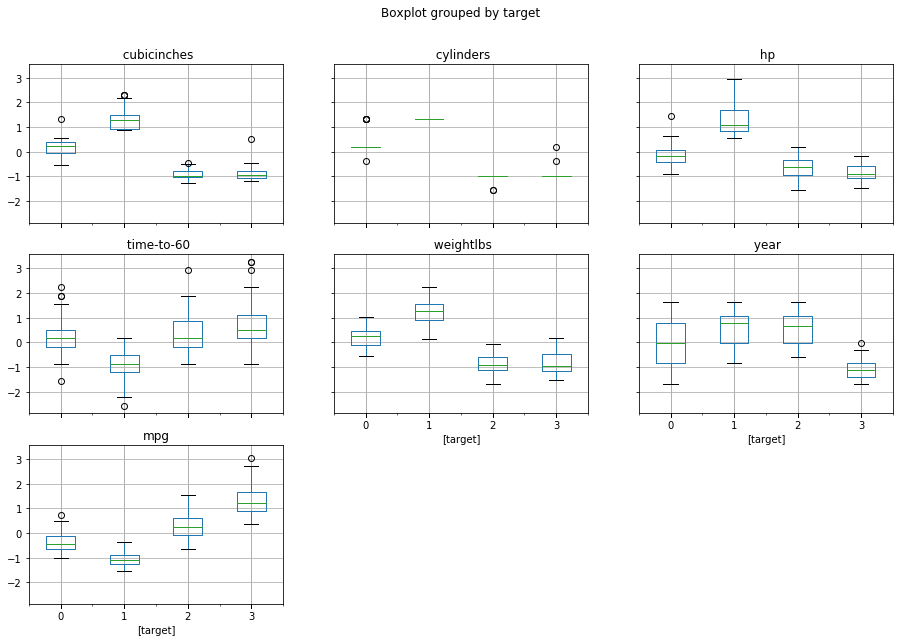

In [123]:
final_train.boxplot(by = 'target', layout=(3,3), figsize=(15, 10))

Conclusion: We can see there is a variation in terms of the feature values across different groups.